In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('iris_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Name'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Name, dtype: int64

In [7]:
data = df[['SepalLength', 'PetalLength']]

In [8]:
clf = KMeans(n_clusters=3)
res = clf.fit_predict(data)
print(res)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [9]:
df['Name']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Name, Length: 150, dtype: object

0: versicolor 1: setosa 2: virginica

In [10]:
df_copy = df.copy()

In [27]:
df_copy['Name'] = df['Name'].map({'setosa':1, 'versicolor':2, 'virginica':0})

In [28]:
res_series = pd.Series(res)

In [29]:
res_series

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Length: 150, dtype: int32

In [30]:
df_copy['Name']

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Name, Length: 150, dtype: int64

In [31]:
df_failed = df_copy[df_copy['Name'] != res_series][['SepalLength', 'PetalLength']]

In [32]:
df_success = df_copy[df_copy['Name'] == res_series][['SepalLength', 'PetalLength']]

In [33]:
df_failed.count

<bound method DataFrame.count of      SepalLength  PetalLength
50           7.0          4.7
52           6.9          4.9
76           6.8          4.8
77           6.7          5.0
98           5.1          3.0
101          5.8          5.1
106          4.9          4.5
113          5.7          5.0
114          5.8          5.1
119          6.0          5.0
121          5.6          4.9
123          6.3          4.9
126          6.2          4.8
127          6.1          4.9
138          6.0          4.8
142          5.8          5.1
146          6.3          5.0
149          5.9          5.1>

In [34]:
df_success.count

<bound method DataFrame.count of      SepalLength  PetalLength
0            5.1          1.4
1            4.9          1.4
2            4.7          1.3
3            4.6          1.5
4            5.0          1.4
..           ...          ...
143          6.8          5.9
144          6.7          5.7
145          6.7          5.2
147          6.5          5.2
148          6.2          5.4

[132 rows x 2 columns]>

/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


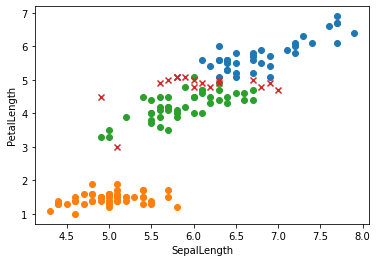

In [39]:
plt.scatter(x=df_success[df_copy['Name'] == 0]['SepalLength'], y=df_success[df_copy['Name'] == 0]['PetalLength'], marker='o')
plt.scatter(x=df_success[df_copy['Name'] == 1]['SepalLength'], y=df_success[df_copy['Name'] == 1]['PetalLength'], marker='o')
plt.scatter(x=df_success[df_copy['Name'] == 2]['SepalLength'], y=df_success[df_copy['Name'] == 2]['PetalLength'], marker='o')
plt.scatter(x=df_failed['SepalLength'], y=df_failed['PetalLength'], marker='x')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.show()